___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# K Means Clustering Project 

For this project we will attempt to use K-Means Clustering to cluster universities into to two groups: Private and Public.

___

**It is very important to note, we already have the accurate labels for this dataset, but we will NOT use them for the K-Means clustering algorithm, since that is an unsupervised learning algorithm.** 

When using the K-Means algorithm under normal circumstances, it is because you do not have labels. In this case, we will use the labels to try to get an idea of how well the algorithm performed, but you won't usually do this for K-Means, so the classification report and confusion matrix at the end of this project would not happen in the real world.
___

## The Data

We will use a DataFrame with 777 observations on the following 18 variables:

* **Private** Column with levels 'No' and 'Yes' indicating public or private university respectively - DROP THIS COLUMN!
* **Apps** Number of applications received
* **Accept** Number of applications accepted
* **Enroll** Number of new students enrolled
* **Top10perc** Percentage of new students from top 10% of H.S. class
* **Top25perc** Percentage of new students from top 25% of H.S. class
* **F.Undergrad** Number of full-time undergraduates
* **P.Undergrad** Number of part-time undergraduates
* **Outstate** Out-of-state tuition
* **Room.Board** Room and board costs
* **Books** Estimated book costs
* **Personal** Estimated personal spending
* **PhD** Percentage of faculty with PhDs
* **Terminal** Percentage of faculty with terminal degree
* **S.F.Ratio** Student/Faculty ratio
* **perc.alumni** Percentage of alumni who donate
* **Expend** Instructional expenditure per student
* **Grad.Rate** Graduation rate


## Import Libraries

**Import the libraries you usually use for data analysis.**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## Get the Data

**Read in the College_Data file using `pd.read_csv`. Figure out how to set the first column as the index.**

In the original data, the 1st column is un-named, and lists the university names for each row, hence make them the row labels.

In [2]:
uni = pd.read_csv('College_Data.csv', index_col=0)

In [4]:
# 777 rows, 18 columns (as described above)

uni.shape

(777, 18)

**Check the head of the data**

In [3]:
uni.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


**Check the `info()` and `describe()` methods on the data.**

In [5]:
# Universities from Abilene Christian Uni to York College of Pennsylvania!
# No null values
# All numeric features

uni.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Private      777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: 

In [6]:
uni.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


## EDA

It's time to create some data visualizations.

**Create a scatterplot of Grad.Rate versus Room.Board where the points are colored by the Private column.**

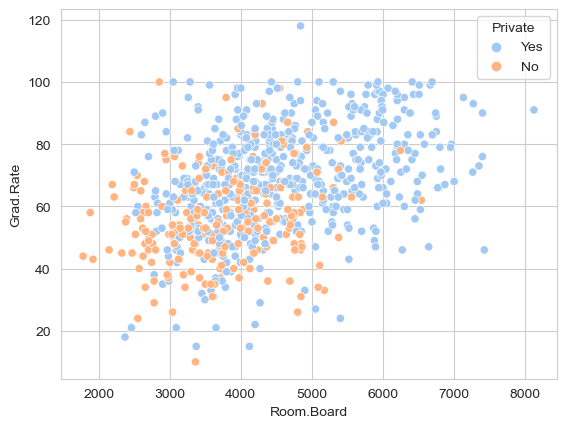

In [9]:
sns.set_style('whitegrid')

sns.scatterplot(data=uni, x='Room.Board', y='Grad.Rate', hue='Private', palette='pastel');

In [ ]:
# Graduation rate and Room & Board costs share a slightly positive linear relationship
# (as costs increase, so does graduation rate, and vice versa)
# Private students tend to pay more and graduate at higher rate

**Create a scatterplot of F.Undergrad versus Outstate where the points are colored by the Private column.**

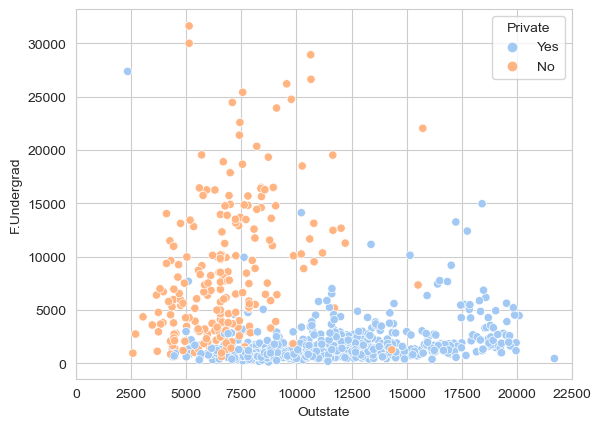

In [11]:
sns.scatterplot(data=uni, x='Outstate', y='F.Undergrad', hue='Private', palette='pastel')
plt.xlim([0, 22500]);

In [ ]:
# Out-of-State tuition applies more to private universities where number of full-time graduates remains steady as tuition rises
# Number of full-time graduates for public universities has much higher numbers for out-of-state tuition 

**Create a stacked histogram showing Out of State Tuition based on the Private column.**

Try doing this using [sns.FacetGrid](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.FacetGrid.html). If that is too tricky, see if you can do it just by using two instances of Pandas `pd.plot(kind='hist')`.

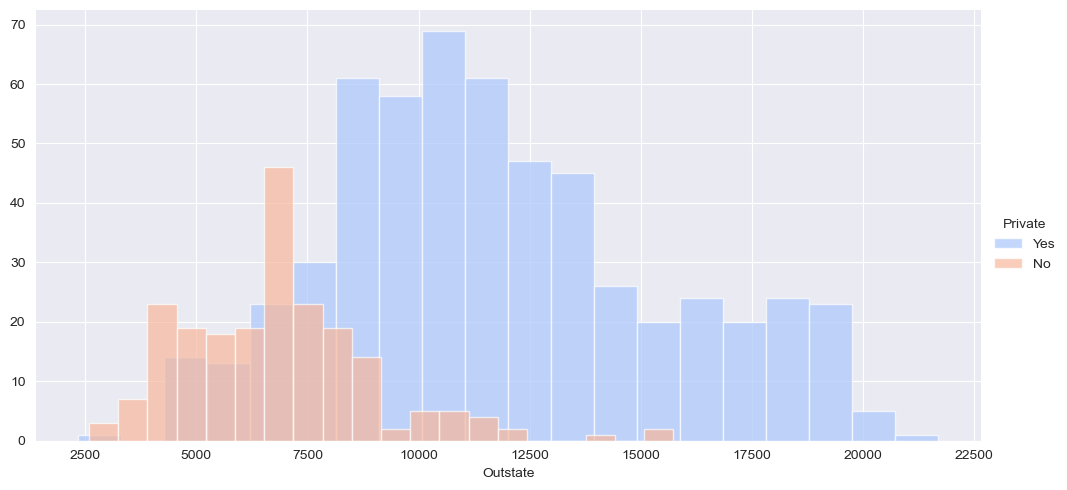

In [34]:
sns.set_style('darkgrid')

g1 = sns.FacetGrid(uni, hue='Private', height=5, aspect=2, palette='coolwarm')

g1 = g1.map(plt.hist, "Outstate", bins=20, alpha=0.7)

g1.add_legend();

In [ ]:
# Private universities have higher out-of-state tuition, averaging around $12,500
# Public universities average around $7000 for out-of-state tuition, with clear cut-off around $16,000

**Create a similar histogram for the Grad.Rate column.**

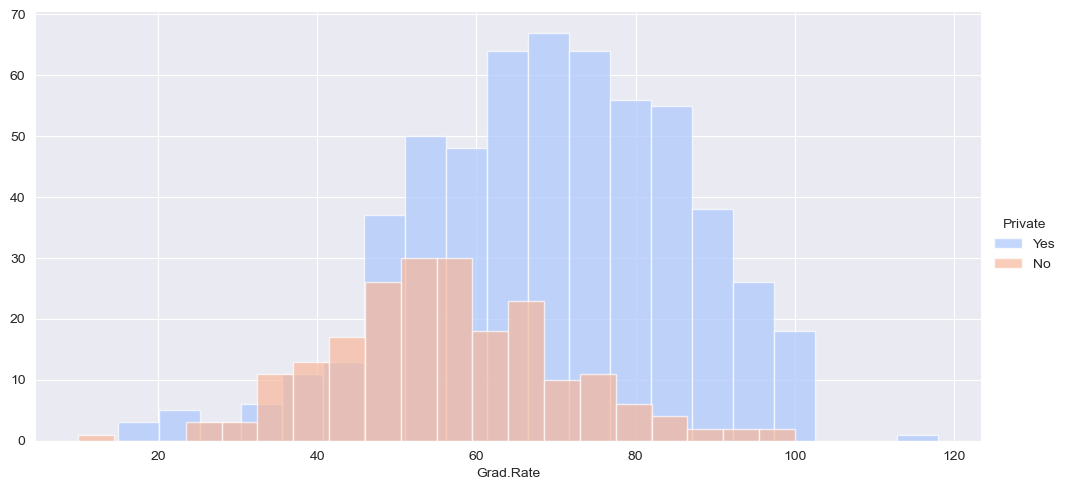

In [36]:
g2 = sns.FacetGrid(uni, hue='Private', height=5, aspect=2, palette='coolwarm')

g2 = g2.map(plt.hist, "Grad.Rate", bins=20, alpha=0.7)

g2.add_legend();

**Notice how there seems to be a private school with a graduation rate of higher than 100%. What is the name of that school?**

In [37]:
# Graduation rate of 118%!!

uni[uni['Grad.Rate'] > 100]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


In [38]:
uni['Grad.Rate'].idxmax()

'Cazenovia College'

In [39]:
uni['Grad.Rate'].max()

118

**Set the school's graduation rate to 100 so it makes sense. You may get a warning (not an error) when doing this operation, so use DataFrame operations, or just re-do the histogram visualization to make sure it actually went through.**

In [40]:
uni.loc['Cazenovia College', 'Grad.Rate'] = 100

In [41]:
uni[uni['Grad.Rate'] > 100]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate


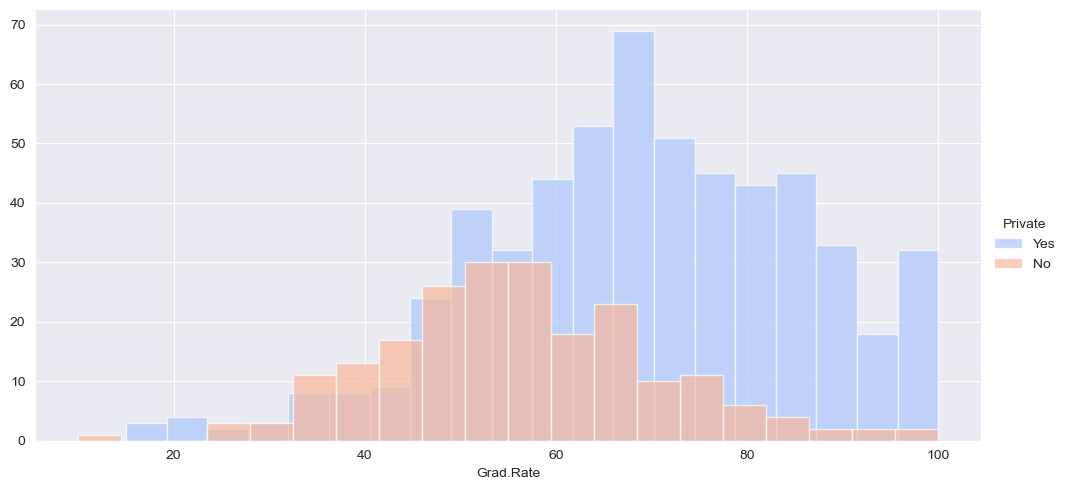

In [42]:
g2 = sns.FacetGrid(uni, hue='Private', height=5, aspect=2, palette='coolwarm')

g2 = g2.map(plt.hist, "Grad.Rate", bins=20, alpha=0.7)

g2.add_legend();

In [ ]:
# Private unis have higher graduation rate overall, but both public and private are normally distributed between 0-100%

## K Means Cluster Creation

Now it is time to create the predicted cluster labels.

**Import KMeans from SciKit Learn.**

In [43]:
from sklearn.cluster import KMeans

**Create an instance of a K-Means model with 2 clusters.**

In [44]:
# It must be two clusters to represent the binary outcome: Private or Public

kmean = KMeans(n_clusters=2)

**Fit the model to all the data except for the Private label.**

In [45]:
train = uni.drop('Private', axis=1)

test = uni['Private']

In [46]:
kmean.fit(train)

KMeans(n_clusters=2)

**What are the cluster center vectors?**

In [47]:
kmean.cluster_centers_

array([[1.81323468e+03, 1.28716592e+03, 4.91044843e+02, 2.53094170e+01,
        5.34708520e+01, 2.18854858e+03, 5.95458894e+02, 1.03957085e+04,
        4.31136472e+03, 5.41982063e+02, 1.28033632e+03, 7.04424514e+01,
        7.78251121e+01, 1.40997010e+01, 2.31748879e+01, 8.93204634e+03,
        6.50926756e+01],
       [1.03631389e+04, 6.55089815e+03, 2.56972222e+03, 4.14907407e+01,
        7.02037037e+01, 1.30619352e+04, 2.46486111e+03, 1.07191759e+04,
        4.64347222e+03, 5.95212963e+02, 1.71420370e+03, 8.63981481e+01,
        9.13333333e+01, 1.40277778e+01, 2.00740741e+01, 1.41705000e+04,
        6.75925926e+01]])

In [ ]:
# Note that there are two arrays for two clusters
# Each cluster center is defined by 17-dimension vector, to match the 17 input features 

## Evaluation

There is no perfect way to evaluate clustering if you do not have the true labels, however, in this exercise we do have the true labels so we take advantage of this to evaluate our clusters predictions. Keep in mind that you usually won't have this luxury in the real world.

**Create a new column for DataFrame called 'Cluster', which is a 1 for a Private school, and a 0 for a public school.**

In [50]:
uni['Private'].value_counts()

Yes    565
No     212
Name: Private, dtype: int64

In [48]:
uni['Cluster'] = uni.Private.map({'No': 0, 'Yes': 1})

In [49]:
uni.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Cluster
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1


**Create a confusion matrix and classification report to see how well the K-Means Clustering worked without being given any labels.**

In [52]:
# K-Means model cluster predictions

kmean.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [53]:
uni['Cluster']

Abilene Christian University      1
Adelphi University                1
Adrian College                    1
Agnes Scott College               1
Alaska Pacific University         1
                                 ..
Worcester State College           0
Xavier University                 1
Xavier University of Louisiana    1
Yale University                   1
York College of Pennsylvania      1
Name: Cluster, Length: 777, dtype: int64

In [54]:
from sklearn.metrics import classification_report, confusion_matrix

In [55]:
print(confusion_matrix(uni['Cluster'], kmean.labels_))

[[138  74]
 [531  34]]


In [56]:
print(classification_report(uni['Cluster'], kmean.labels_))

              precision    recall  f1-score   support

           0       0.21      0.65      0.31       212
           1       0.31      0.06      0.10       565

    accuracy                           0.22       777
   macro avg       0.26      0.36      0.21       777
weighted avg       0.29      0.22      0.16       777



Awful, but considering the algorithm is purely using the features to cluster the universities into 2 distinct groups and its predictions are not based on Yes or No, like the cluster numbers in the DataFrame. 

However, hopefully you can begin to see how K-Means is useful for clustering un-labeled data.

## Great Job!

In [ ]:
# It seems that KMeans has labelled opposite numbers...maybe if we map Private to 0 and Public to 1 instead...

In [57]:
uni['opp_Cluster'] = uni.Private.map({'Yes': 0, 'No': 1})

In [58]:
print(confusion_matrix(uni['opp_Cluster'], kmean.labels_))

[[531  34]
 [138  74]]


In [ ]:
# Same number of mis-labelled classifications...

In [59]:
print(classification_report(uni['opp_Cluster'], kmean.labels_))

              precision    recall  f1-score   support

           0       0.79      0.94      0.86       565
           1       0.69      0.35      0.46       212

    accuracy                           0.78       777
   macro avg       0.74      0.64      0.66       777
weighted avg       0.76      0.78      0.75       777



In [ ]:
# However, accuracy is now 78% overall - much better, considering imbalanced dataset